In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")
df

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
0         466132  ...                     YES              71610         6510   
1         468176  ...                       ?               5070          780   
2         430632  ...                      NO              34650         7700   
3         608117  ...                      NO              63400         6340   
4         610706  ...                      NO               6500         1300   
..           ...  ...                     ...                ...          ...   
995       431289  ...                       ?              87200        17440   
996       608177  ...                       ?             108480        18080   
997       442797  ...                     YES              67500         7500   
998       441714  ...                     YES              46980         5220   
999       612260  ...                       ?               5060          460   

    property_claim vehicle_claim   auto_make  auto_model auto_year  \
0            13020         52080        Saab         92x      2004   
1              780          3510    Mercedes        E400      2007   
2             3850         23100       Dodge         RAM      2007   
3             6340         50720   Chevrolet       Tahoe      2014   
4              650          4550      Accura         RSX      2009   
..             ...           ...         ...         ...       ...   
995           8720         61040       Honda      Accord      2006   
996          18080         72320  Volkswagen      Passat      2015   
997           7500         52500      Suburu     Impreza      1996   
998           5220         36540        Audi          A5      1998   
999            920          3680    Mercedes        E400      2007   

    fraud_reported _c39  
0                Y  NaN  
1                Y  NaN  
2                N  NaN  
3                Y  NaN  
4                N  NaN  
..             ...  ...  
995              N  NaN  
996              N  NaN  
997              N  NaN  
998              N  NaN  
999              N  NaN  

[1000 rows x 40 columns]

In [4]:
#Understanding our dataset, finding total rows and columns
df.shape

(1000, 40)

In [5]:
#finding all columns name
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [6]:
#printing the first 5 rows 
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 40 columns]

In [7]:
#getting index, datatype and memory information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [8]:
#dropping the _c39 column as there is no use to keep it
df.drop('_c39',inplace=True,axis=1)

In [9]:
df

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... witnesses police_report_available total_claim_amount  \
0         466132  ...         2                     YES              71610   
1         468176  ...         0                       ?               5070   
2         430632  ...         3                      NO              34650   
3         608117  ...         2                      NO              63400   
4         610706  ...         1                      NO               6500   
..           ...  ...       ...                     ...                ...   
995       431289  ...         1                       ?              87200   
996       608177  ...         3                       ?             108480   
997       442797  ...         3                     YES              67500   
998       441714  ...         1                     YES              46980   
999       612260  ...         3                       ?               5060   

    injury_claim property_claim  vehicle_claim   auto_make auto_model  \
0           6510          13020          52080        Saab        92x   
1            780            780           3510    Mercedes       E400   
2           7700           3850          23100       Dodge        RAM   
3           6340           6340          50720   Chevrolet      Tahoe   
4           1300            650           4550      Accura        RSX   
..           ...            ...            ...         ...        ...   
995        17440           8720          61040       Honda     Accord   
996        18080          18080          72320  Volkswagen     Passat   
997         7500           7500          52500      Suburu    Impreza   
998         5220           5220          36540        Audi         A5   
999          460            920           3680    Mercedes       E400   

    auto_year fraud_reported  
0        2004              Y  
1        2007              Y  
2        2007              N  
3        2014              Y  
4        2009              N  
..        ...            ...  
995      2006              N  
996      2015              N  
997      1996              N  
998      1998              N  
999      200

In [10]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

Here we can see that there are no null values in the dataset

In [11]:
#generating descriptive statistics for all the columns
df.describe()

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  
count     1000.000000    1000.000000  1000.000000  
mean      7399.570000   37928.950000  2005.103000  
std       4824.726179   18886.252893     6.015861  
min          0.000000      70.000000  1995.000000  
25%       4445.000000   30292.500000  2000.000000  
50%       6750.000000   42100.000000  2005.000000  
75%      10885.000000   50822.500000  2010.000000  
max      23670.000000   79560.000000  2015.000000

In [12]:
#Earlier in the data we had seen that policy_bind_date is object so here we will change its type now
df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'])

<AxesSubplot:>

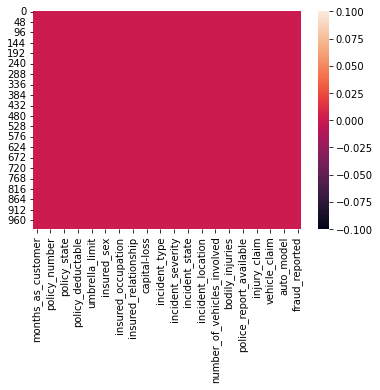

In [13]:
#Visualizing the data null values using heatmap
sns.heatmap(df.isnull())

In [14]:
#checking the value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: months_as_customer, Length: 391, dtype: int64


43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: age, dtype: int64


521585    1
687755    1
674485    1
223404    1
991480    1
         ..
563878    1
620855    1
583169    1
337677    1
556080    1
Name: policy_number, Length: 1000, dtype: int64


2006-01-01    3
1992-04-28    3
1992-05-08    3
1991-12-14    2
2004-09-08    2
             ..
2014-03-06    1
1998-12-12    1
1999-02-18    1
1997-10-30    1
1996-11-11    1
Name: policy_bind_date, Length: 951, dtype: int64

In [15]:
#checking for '?' in collision_type column
df.loc[df['collision_type']=='?']

months_as_customer  age  policy_number policy_bind_date policy_state  \
1                   228   42         342868       2006-06-27           IN   
4                   228   44         367455       2014-06-06           IL   
13                  121   34         626808       2012-10-26           OH   
26                  257   43         863236       1990-09-20           IN   
27                  202   34         608513       2002-07-18           IN   
..                  ...  ...            ...              ...          ...   
964                 163   37         390256       2009-11-25           IN   
969                 398   55         844062       1990-05-25           OH   
983                  17   39         774895       2006-10-28           IL   
994                 141   30         681486       2007-03-24           IN   
999                 456   60         556080       1996-11-11           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
1      250/500               2000                1197.22         5000000   
4     500/1000               1000                1583.91         6000000   
13     100/300               1000                 936.61               0   
26     100/300               2000                1322.10               0   
27     100/300                500                 848.07         3000000   
..         ...                ...                    ...             ...   
964   500/1000               1000                1200.33         4000000   
969    250/500                500                 862.19               0   
983    250/500               1000                 840.95               0   
994   500/1000               1000                1347.04               0   
999    250/500               1000                 766.19               0   

     insured_zip  ... witnesses police_report_available total_claim_amount  \
1         468176  ...         0                       ?               5070   
4         610706  ...         1                      NO               6500   
13        464652  ...         1                      NO               7280   
26        436984  ...         3                     YES               9020   
27        607730  ...         1                       ?               5720   
..           ...  ...       ...                     ...                ...   
964       477631  ...         1                     YES               3900   
969       606858  ...         3                       ?               6600   
983       431202  ...         1                       ?               3440   
994       430665  ...         2                     YES               6480   
999       612260  ...         3                       ?               5060   

    injury_claim property_claim  vehicle_claim   auto_make  auto_model  \
1            780            780           3510    Mercedes        E400   
4           1300            650           4550      Accura         RSX   
13          1120           1120           5040      Toyota  Highlander   
26          1640            820           6560      Toyota       Camry   
27          1040            520           4160      Suburu   Forrestor   
..           ...            ...            ...         ...         ...   
964          390            780           2730  Volkswagen       Jetta   
969          600           1200           4800      Accura         MDX   
983          430            430           2580      Suburu      Legacy   
994          540           1080           4860       Honda       Civic   
999          460            920           3680    Mercedes        E400   

    auto_year fraud_reported  
1        2007              Y  
4        2009              N  
13       2010              N  
26       2005              N  
27       2003              Y  
..        ...            ...  
964      2008              Y  
969      2012              N  
983      2002              N  
994      1996              N  


In [16]:
df['collision_type']=df['collision_type'].replace('?', np.nan)
df['police_report_available']=df['police_report_available'].replace('?', np.nan)
df['property_damage']=df['property_damage'].replace('?', np.nan)

In [17]:
#lets check the null values again
df.isnull().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [18]:
#now filling the null values
df['collision_type']=df['collision_type'].fillna(method='ffill')
df['property_damage']=df['property_damage'].fillna(method='ffill')
df['police_report_available']=df['police_report_available'].fillna(method='ffill')
print(df.isnull().sum())
print(df.shape)

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

<AxesSubplot:>

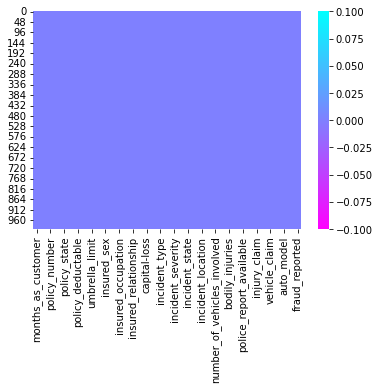

In [19]:
sns.heatmap(df.isnull(),cmap= 'cool_r')

Now we can see that there are no missing values in my dataset

In [20]:
#Separating numerical and categorical columns

categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print('Categorical Columns:', categorical_col)
print('\n')

numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print('Numerical Columns:', numerical_col)

Categorical Columns: ['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']


Numerical Columns: ['months_as_customer', 'age', 'policy_number', 'policy_bind_date', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year']


In [21]:
#checking no of unique values in each column
df.nunique().to_frame('No of unique values')

No of unique values
months_as_customer                           391
age                                           46
policy_number                               1000
policy_bind_date                             951
policy_state                                   3
policy_csl                                     3
policy_deductable                              3
policy_annual_premium                        991
umbrella_limit                                11
insured_zip                                  995
insured_sex                                    2
insured_education_level                        7
insured_occupation                            14
insured_hobbies                               20
insured_relationship                           6
capital-gains                                338
capital-loss                                 354
incident_date                                 60
incident_type                                  4
collision_type                                 3
incident_severity                              4
authorities_contacted                          5
incident_state                                 7
incident_city                                  7
incident_location                           1000
incident_hour_of_the_day                      24
number_of_vehicles_involved                    4
property_damage                                2
bodily_injuries                                3
witnesses                                      4
police_report_available                        2
total_claim_amount                           763
injury_claim                                 638
property_claim                               626
vehicle_claim                                726
auto_make                                     14
auto_model                                    39
auto_year                                     21
fraud_reported                                 2

These are the unique values present in the dataset. Here we can drop few columns like policy no, policy bind date, insured zip, incident location and policy annual premium

In [22]:
df.drop(['policy_number','policy_bind_date','policy_annual_premium','insured_zip','incident_location'],axis=1,inplace=True)

In [23]:
#Checking the list of counts of target
df['fraud_reported'].unique()

array(['Y', 'N'], dtype=object)

In [24]:
#checking the unique values in target column
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

We can say that N stands for the customers who have not done any fraud and Y stands for customers for whom the fraud is been reported.

N    753
Y    247
Name: fraud_reported, dtype: int64


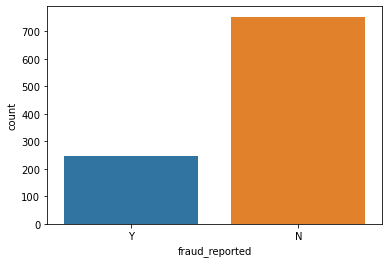

In [25]:
#Data Visualization
ax=sns.countplot(x='fraud_reported', data=df)
print(df['fraud_reported'].value_counts())

We can say that more customers have not done fraud and only 247 customers have done fraud

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64


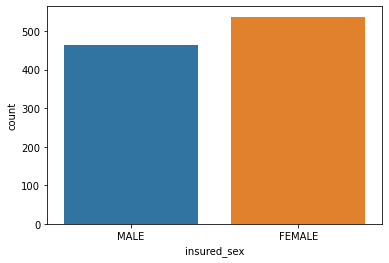

In [26]:
#visualizing the count of insured_sex
print(df['insured_sex'].value_counts())
ax=sns.countplot(x='insured_sex', data=df)
plt.show()

We can say that more females are insured as compared to males

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64


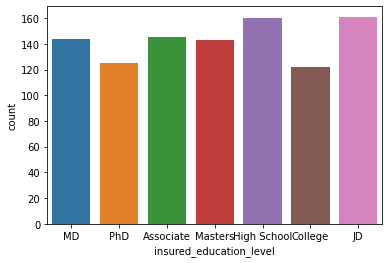

In [27]:
print(df['insured_education_level'].value_counts())
ax=sns.countplot(x='insured_education_level', data=df)
plt.show()

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64


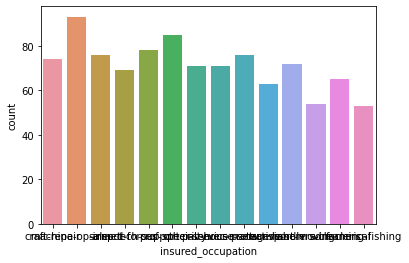

In [28]:
print(df['insured_occupation'].value_counts())
ax=sns.countplot(x='insured_occupation', data=df)
plt.show()

reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
golf              55
camping           55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64


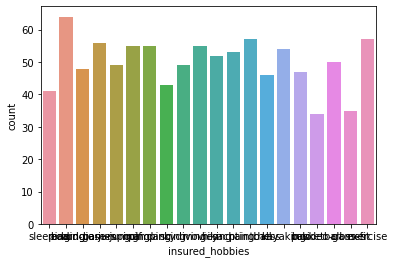

In [29]:
print(df['insured_hobbies'].value_counts())
ax=sns.countplot(x='insured_hobbies', data=df)
plt.show()

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64


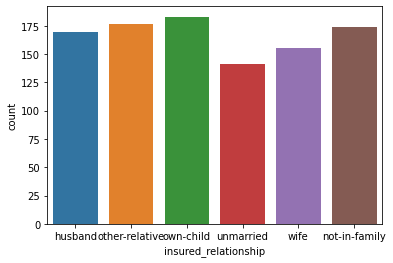

In [30]:
print(df['insured_relationship'].value_counts())
ax=sns.countplot(x='insured_relationship', data=df)
plt.show()

02-02-2015    28
17-02-2015    26
07-01-2015    25
10-01-2015    24
04-02-2015    24
24-01-2015    24
19-01-2015    23
08-01-2015    22
13-01-2015    21
30-01-2015    21
12-02-2015    20
22-02-2015    20
31-01-2015    20
06-02-2015    20
21-02-2015    19
01-01-2015    19
23-02-2015    19
12-01-2015    19
14-01-2015    19
21-01-2015    19
03-01-2015    18
14-02-2015    18
01-02-2015    18
28-02-2015    18
20-01-2015    18
18-01-2015    18
25-02-2015    18
06-01-2015    17
09-01-2015    17
08-02-2015    17
24-02-2015    17
26-02-2015    17
13-02-2015    16
15-02-2015    16
16-02-2015    16
05-02-2015    16
16-01-2015    16
17-01-2015    15
18-02-2015    15
28-01-2015    15
15-01-2015    15
22-01-2015    14
20-02-2015    14
27-02-2015    14
23-01-2015    13
03-02-2015    13
27-01-2015    13
09-02-2015    13
04-01-2015    12
01-03-2015    12
26-01-2015    11
29-01-2015    11
02-01-2015    11
19-02-2015    10
11-02-2015    10
10-02-2015    10
07-02-2015    10
25-01-2015    10
11-01-2015    

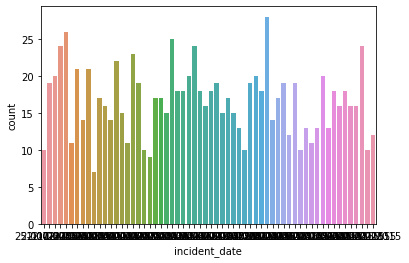

In [31]:
print(df['incident_date'].value_counts())
ax=sns.countplot(x='incident_date', data=df)
plt.show()

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64


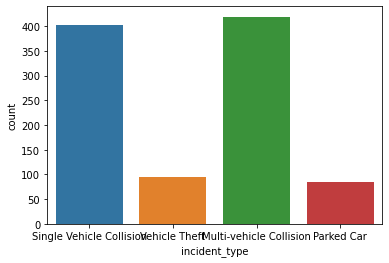

In [32]:
print(df['incident_type'].value_counts())
ax=sns.countplot(x='incident_type', data=df)
plt.show()

Rear Collision     364
Side Collision     332
Front Collision    304
Name: collision_type, dtype: int64


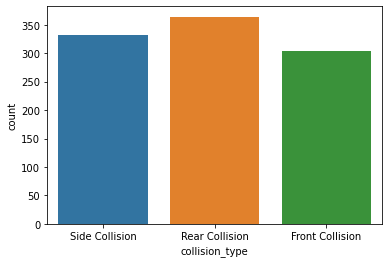

In [33]:
print(df['collision_type'].value_counts())
ax=sns.countplot(x='collision_type', data=df)
plt.show()

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64


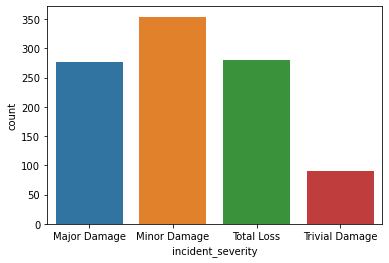

In [34]:
print(df['incident_severity'].value_counts())
ax=sns.countplot(x='incident_severity', data=df)
plt.show()

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64


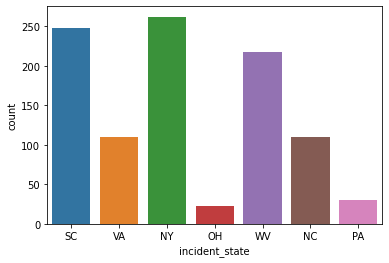

In [35]:
print(df['incident_state'].value_counts())
ax=sns.countplot(x='incident_state', data=df)
plt.show()

NO     521
YES    479
Name: property_damage, dtype: int64


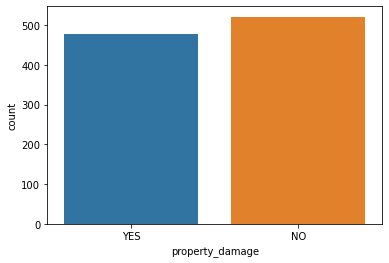

In [36]:
print(df['property_damage'].value_counts())
ax=sns.countplot(x='property_damage', data=df)
plt.show()

NO     525
YES    475
Name: police_report_available, dtype: int64


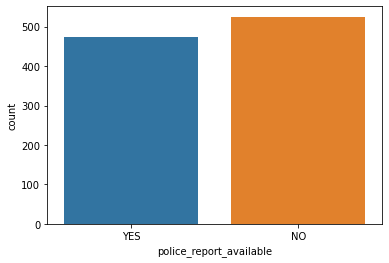

In [37]:
print(df['police_report_available'].value_counts())
ax=sns.countplot(x='police_report_available', data=df)
plt.show()

RAM               43
Wrangler          42
A3                37
Neon              37
MDX               36
Jetta             35
Passat            33
A5                32
Legacy            32
Pathfinder        31
Malibu            30
92x               28
Camry             28
Forrestor         28
F150              27
95                27
E400              27
93                25
Grand Cherokee    25
Escape            24
Tahoe             24
Maxima            24
Ultima            23
X5                23
Highlander        22
Civic             22
Silverado         22
Fusion            21
ML350             20
Impreza           20
Corolla           20
TL                20
CRV               20
C300              18
3 Series          18
X6                16
M5                15
Accord            13
RSX               12
Name: auto_model, dtype: int64


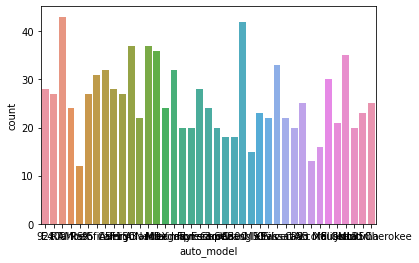

In [38]:
print(df['auto_model'].value_counts())
ax=sns.countplot(x='auto_model', data=df)
plt.show()

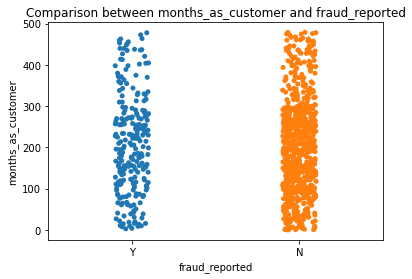

In [39]:
#Bivariate Analysis
#comparing months_as_customer and fraud_reported
plt.title('Comparison between months_as_customer and fraud_reported')
sns.stripplot(x='fraud_reported', y='months_as_customer', data=df)
plt.show()

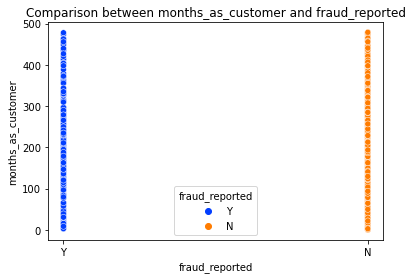

In [40]:
plt.title('Comparison between months_as_customer and fraud_reported')
sns.scatterplot(x='fraud_reported', y='months_as_customer', data=df, hue='fraud_reported', palette='bright')
plt.show()

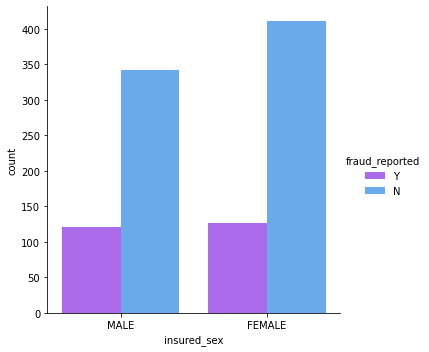

In [41]:
sns.catplot(x='insured_sex', hue='fraud_reported', palette='cool_r', kind='count', data=df)
plt.show()

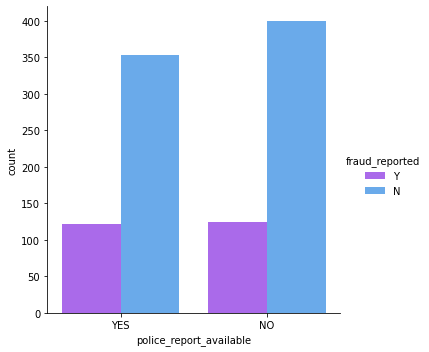

In [42]:
sns.catplot(x='police_report_available', hue='fraud_reported', palette='cool_r', kind='count', data=df)
plt.show()

<AxesSubplot:xlabel='insured_hobbies', ylabel='count'>

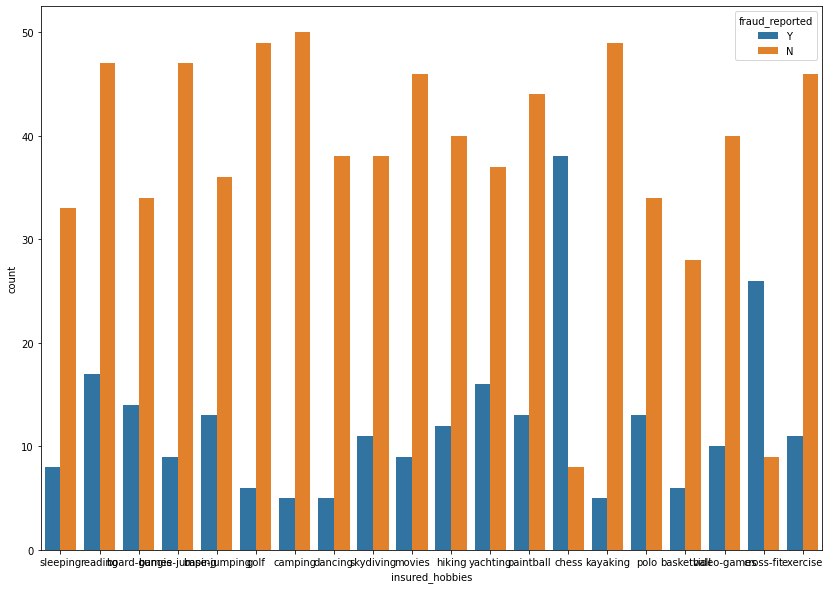

In [47]:
f, ax = plt.subplots(figsize=(14, 10))
sns.countplot(x='insured_hobbies',hue='fraud_reported',data=df)

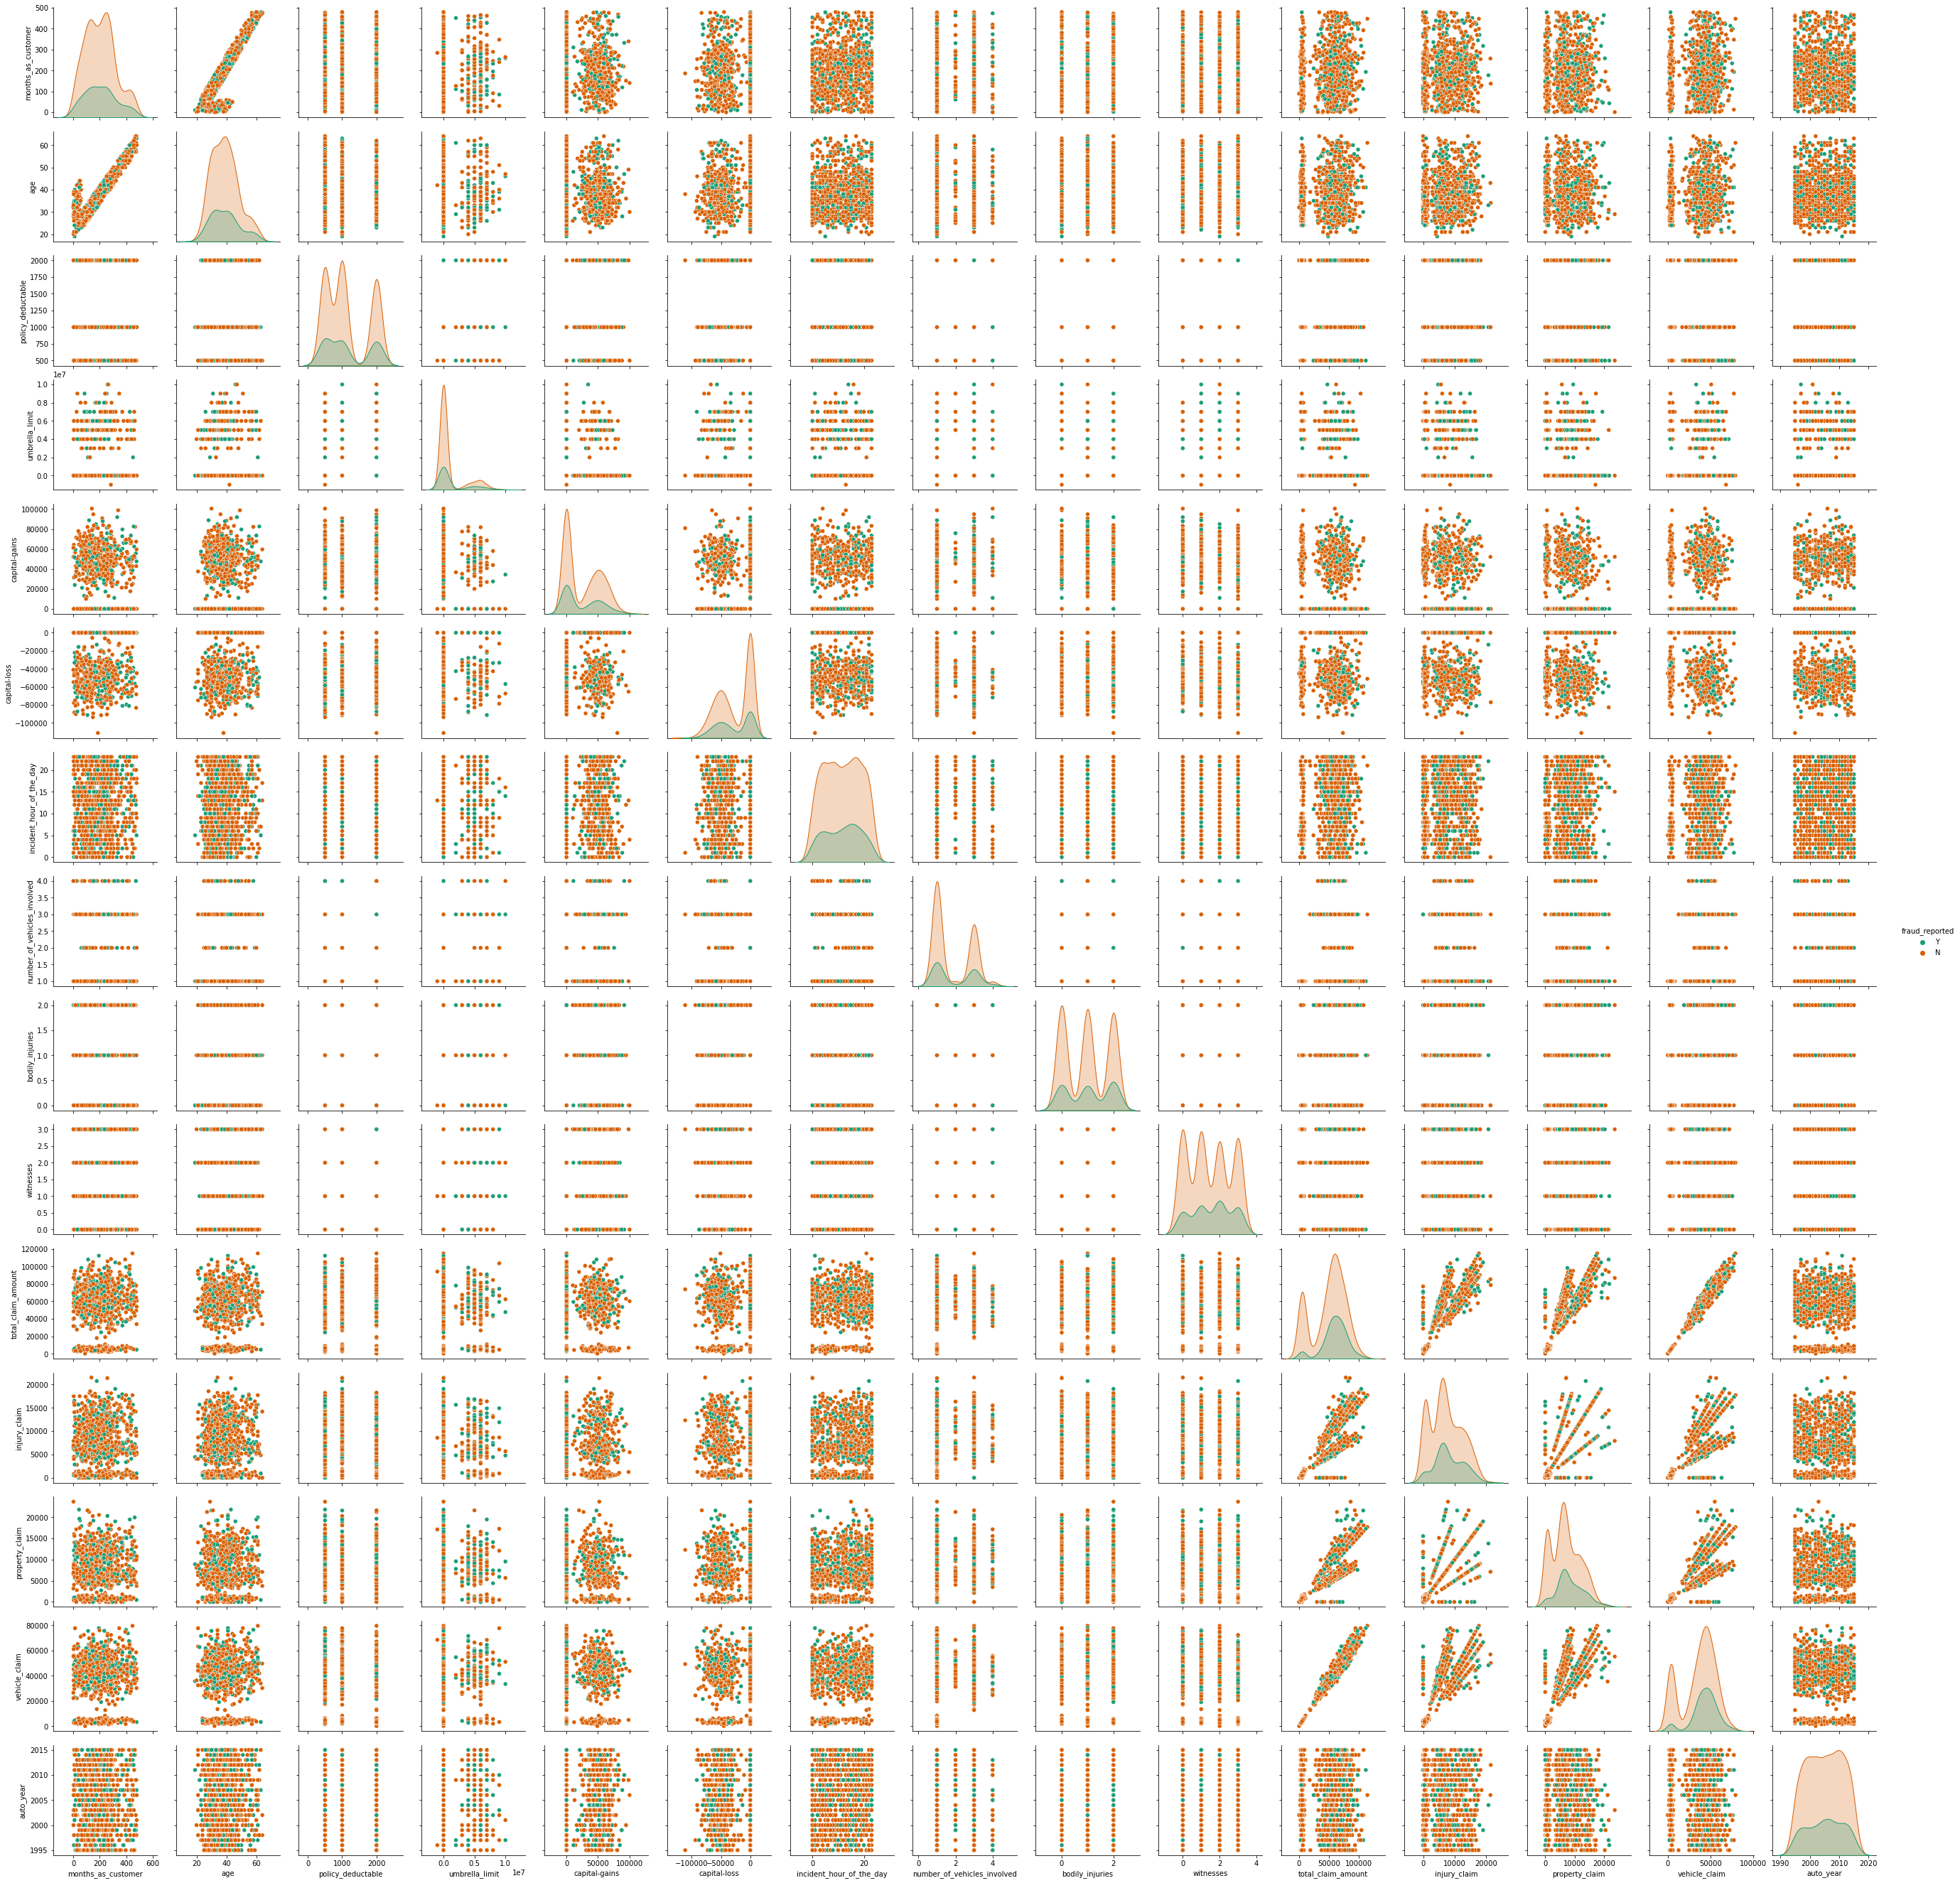

In [48]:
sns.pairplot(df, hue='fraud_reported', palette='Dark2')
plt.show()

In [49]:
#Encoding categorical columns using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
OE= OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]= OE.fit_transform(df[i].values.reshape(-1,1))
        
df

months_as_customer  age  policy_state  policy_csl  policy_deductable  \
0                   328   48           2.0         1.0               1000   
1                   228   42           1.0         1.0               2000   
2                   134   29           2.0         0.0               2000   
3                   256   41           0.0         1.0               2000   
4                   228   44           0.0         2.0               1000   
..                  ...  ...           ...         ...                ...   
995                   3   38           2.0         2.0               1000   
996                 285   41           0.0         0.0               1000   
997                 130   34           2.0         1.0                500   
998                 458   62           0.0         2.0               2000   
999                 456   60           2.0         1.0               1000   

     umbrella_limit  insured_sex  insured_education_level  insured_occupation  \
0                 0          1.0                      4.0                 2.0   
1           5000000          1.0                      4.0                 6.0   
2           5000000          0.0                      6.0                11.0   
3           6000000          0.0                      6.0                 1.0   
4           6000000          1.0                      0.0                11.0   
..              ...          ...                      ...                 ...   
995               0          0.0                      5.0                 2.0   
996               0          0.0                      6.0                 9.0   
997         3000000          0.0                      5.0                 1.0   
998         5000000          1.0                      0.0                 5.0   
999               0          0.0                      0.0                11.0   

     insured_hobbies  ...  witnesses  police_report_available  \
0               17.0  ...          2                      1.0   
1               15.0  ...          0                      1.0   
2                2.0  ...          3                      0.0   
3                2.0  ...          2                      0.0   
4                2.0  ...          1                      0.0   
..               ...  ...        ...                      ...   
995             13.0  ...          1                      1.0   
996             17.0  ...          3                      1.0   
997              3.0  ...          3                      1.0   
998              0.0  ...          1                      1.0   
999             11.0  ...          3                      1.0   

     total_claim_amount  injury_claim  property_claim  vehicle_claim  \
0                 71610          6510           13020          52080   
1                  5070           780             780           3510   
2                 34650          7700            3850          23100   
3                 63400          6340            6340          50720   
4                  6500          1300             650           4550   
..                  ...           ...             ...            ...   
995               87200         17440            8720          61040   
996              108480         18080           18080          72320   
997               67500          7500            7500          52500   
998               46980          5220            5220          36540   
999                5060           460             920           3680   

     auto_make  auto_model  auto_year  fraud_reported  
0         10.0         1.0       2004             1.0  
1          8.0        12.0       2007             1.0  
2          4.0        30.0       2007             0.0  
3          3.0        34.0       2014             1.0  
4          0.0        31.0       2009             0.0  
..         ...         ...        ...             ...  
995        6.0         6.0       2006             0.0  
996       13.

In [50]:
#checking the correlation between features and target
cor=df.corr()
cor

months_as_customer       age  policy_state  \
months_as_customer                     1.000000  0.922098     -0.000328   
age                                    0.922098  1.000000     -0.014533   
policy_state                          -0.000328 -0.014533      1.000000   
policy_csl                            -0.026819 -0.015185      0.001027   
policy_deductable                      0.026807  0.029188      0.010033   
umbrella_limit                         0.015498  0.018126     -0.029580   
insured_sex                            0.060925  0.073337     -0.020481   
insured_education_level               -0.000833  0.000969     -0.034327   
insured_occupation                     0.009814  0.017220     -0.031215   
insured_hobbies                       -0.093661 -0.081315     -0.038689   
insured_relationship                   0.069727  0.074832     -0.018506   
capital-gains                          0.006399 -0.007075      0.074551   
capital-loss                           0.020209  0.007368     -0.030338   
incident_date                         -0.002985  0.002416      0.027287   
incident_type                         -0.017377 -0.025626      0.031848   
collision_type                        -0.054097 -0.059131      0.040197   
incident_severity                     -0.059581 -0.058439     -0.026377   
authorities_contacted                  0.010021  0.015417     -0.016777   
incident_state                         0.005369  0.005770      0.008723   
incident_city                         -0.000130 -0.002291     -0.002077   
incident_hour_of_the_day               0.070639  0.087161      0.029457   
number_of_vehicles_involved            0.014736  0.022102     -0.042263   
property_damage                       -0.002574 -0.006374     -0.047495   
bodily_injuries                       -0.010162 -0.015679      0.013384   
witnesses                              0.058383  0.052359      0.022960   
police_report_available               -0.045847 -0.042590      0.075587   
total_claim_amount                     0.062108  0.069863     -0.006002   
injury_claim                           0.065329  0.075522     -0.046290   
property_claim                         0.034940  0.060898      0.008406   
vehicle_claim                          0.061013  0.062588      0.001425   
auto_make                              0.047655  0.030410      0.017124   
auto_model                             0.004202  0.017343     -0.025253   
auto_year                             -0.000292  0.001354      0.002114   
fraud_reported                         0.020544  0.012143      0.029432   

                             policy_csl  policy_deductable  umbrella_limit  \
months_as_customer            -0.026819           0.026807        0.015498   
age                           -0.015185           0.029188        0.018126   
policy_state                   0.001027           0.010033       -0.029580   
policy_csl                     1.000000           0.003384        0.021636   
policy_deductable              0.003384           1.000000        0.010870   
umbrella_limit                 0.021636           0.010870        1.000000   
insured_sex                   -0.010757          -0.009733        0.010688   
insured_education_level        0.009153           0.015217       -0.019357   
insured_occupation             0.015788          -0.046733        0.023422   
insured_hobbies               -0.005960           0.004061       -0.037000   
insured_relationship          -0.030063          -0.022945        0.077495   
capital-gains                  0.005249           0.035212       -0.047268   
capital-loss                  -0.034612          -0.023544       -0.024056   
incident_date                 -0.010140          -0.024055       -0.009471   
incident_type                  0.011997          -0.038411        0.015966   
collision_type                 0.017744          -0.040639        0.021404   
incident_severity              0.022530          -0.015711        0.009466   

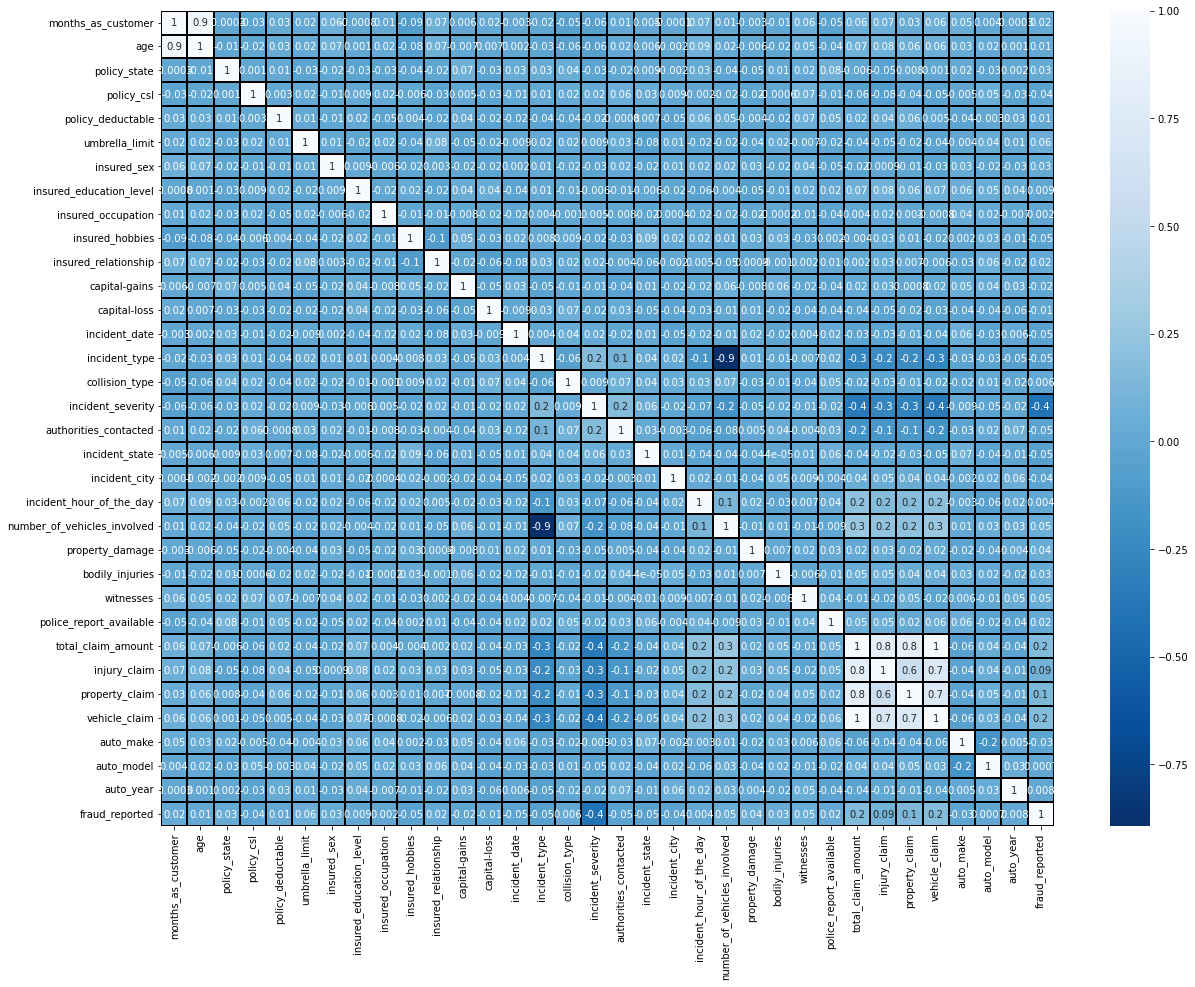

In [51]:
#visualizing the correlation matrix by plotting heatmap
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), linewidths= 0.1, fmt='.1g', linecolor='black', annot=True, cmap='Blues_r')
plt.yticks(rotation= 0);
plt.show()

In [52]:
cor['fraud_reported'].sort_values(ascending=False)

fraud_reported                 1.000000
vehicle_claim                  0.170049
total_claim_amount             0.163651
property_claim                 0.137835
injury_claim                   0.090975
umbrella_limit                 0.058622
number_of_vehicles_involved    0.051839
witnesses                      0.049497
property_damage                0.040322
bodily_injuries                0.033877
insured_sex                    0.030873
policy_state                   0.029432
police_report_available        0.021707
insured_relationship           0.021043
months_as_customer             0.020544
policy_deductable              0.014817
age                            0.012143
insured_education_level        0.008808
auto_year                      0.007928
collision_type                 0.006063
incident_hour_of_the_day       0.004316
insured_occupation             0.001564
auto_model                     0.000720
capital-loss                  -0.014863
capital-gains                 -0.019173


Here we can observe the positive and negative correlated features with the target

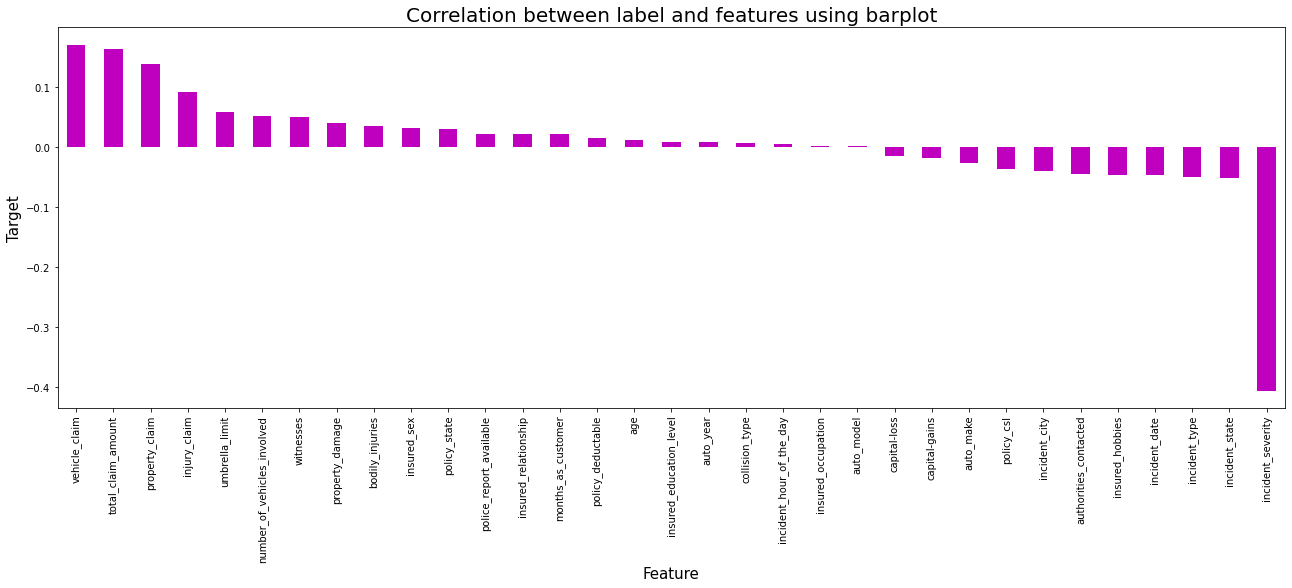

In [59]:
#visualizing the correlation between the label and fetures using bar plot
plt.figure(figsize=(22,7))
df.corr()['fraud_reported'].sort_values(ascending=False).drop(['fraud_reported']).plot(kind='bar', color='m')
plt.xlabel('Feature', fontsize=15)
plt.ylabel('Target', fontsize=15)
plt.title('Correlation between label and features using barplot', fontsize=20)
plt.show()

From the above bar plot we can notice the positive and negative correlation between the features and the target. Here we can see that features auto_model and insured_occupation has very less correlation with the target. 

In [60]:
#separating features and label
x= df.drop('fraud_reported', axis=1)
y= df['fraud_reported']

In [61]:
#feature scaling using standard scalarization
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x= pd.DataFrame(scaler.fit_transform(x), columns= x.columns)
x

months_as_customer       age  policy_state  policy_csl  \
0              1.078140  0.990836      1.187173    0.060937   
1              0.208995  0.334073     -0.016856    0.060937   
2             -0.608002 -1.088913      1.187173   -1.182668   
3              0.452355  0.224613     -1.220886    0.060937   
4              0.208995  0.552994     -1.220886    1.304542   
..                  ...       ...           ...         ...   
995           -1.746582 -0.103769      1.187173    1.304542   
996            0.704407  0.224613     -1.220886   -1.182668   
997           -0.642767 -0.541611      1.187173    0.060937   
998            2.208028  2.523284     -1.220886    1.304542   
999            2.190645  2.304363      1.187173    0.060937   

     policy_deductable  umbrella_limit  insured_sex  insured_education_level  \
0            -0.222383       -0.479476     1.076953                 0.530931   
1             1.412784        1.697980     1.076953                 0.530931   
2             1.412784        1.697980    -0.928546                 1.557877   
3             1.412784        2.133471    -0.928546                 1.557877   
4            -0.222383        2.133471     1.076953                -1.522961   
..                 ...             ...          ...                      ...   
995          -0.222383       -0.479476    -0.928546                 1.044404   
996          -0.222383       -0.479476    -0.928546                 1.557877   
997          -1.039966        0.826998    -0.928546                 1.044404   
998           1.412784        1.697980     1.076953                -1.522961   
999          -0.222383       -0.479476    -0.928546                -1.522961   

     insured_occupation  insured_hobbies  ...  bodily_injuries  witnesses  \
0             -1.158316         1.281737  ...         0.009759   0.461838   
1             -0.162558         0.929078  ...        -1.210174  -1.338700   
2              1.082141        -1.363201  ...         1.229693   1.362107   
3             -1.407256        -1.363201  ...         0.009759   0.461838   
4              1.082141        -1.363201  ...        -1.210174  -0.438431   
..                  ...              ...  ...              ...        ...   
995           -1.158316         0.576420  ...        -1.210174  -0.438431   
996            0.584261         1.281737  ...         1.229693   1.362107   
997           -1.407256        -1.186872  ...         1.229693   1.362107   
998           -0.411497        -1.715859  ...        -1.210174  -0.438431   
999            1.082141         0.223762  ...        -1.210174   1.362107   

     police_report_available  total_claim_amount  injury_claim  \
0                   1.051315            0.714257     -0.189283   
1                   1.051315           -1.807312     -1.363822   
2                  -0.951190           -0.686362      0.054644   
3                  -0.951190            0.403135     -0.224130   
4                  -0.951190           -1.753121     -1.257232   
..                       ...                 ...           ...   
995                 1.051315            1.305049      2.051155   
996                 1.051315            2.111466      2.182342   
997                 1.051315            0.558507      0.013648   
998                 1.051315           -0.219110     -0.453708   
999                 1.051315           -1.807691     -1.429416   

     property_claim  vehicle_claim  auto_make  auto_model  auto_year  
0          1.165505       0.749653   0.856466   -1.645743  -0.183440  
1         -1.372696      -1.823346   0.360539   -0.657470   0.315491  
2         -0.736072      -0.785565  -0.631315    0.959702   0.315491  
3         -0.219722       0.677607  -0.879279    1.319074   1.479664  
4         -1.399654      -1.768252  -1.623169    1.049545   0.648112  
..              ...            ...        ...         ...        ...  
995        0.273817       1.224309  -0.135388   -1.196528   0.149180  
9

In [64]:
y.value_counts()

0.0    753
1.0    247
Name: fraud_reported, dtype: int64

In [65]:
#oversampling the data
!pip install imbalanced-learn

In [66]:
from imblearn.over_sampling import SMOTE
SM= SMOTE()
x,y= SM.fit_resample(x,y)

In [67]:
y.value_counts()

1.0    753
0.0    753
Name: fraud_reported, dtype: int64

In [69]:
#Now the data is balanced, so we can build machine learning classification models
#Modelling

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3, random_state=i)
    RFR= RandomForestClassifier()
    RFR.fit(x_train, y_train)
    pred= RFR.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print ('Best Accuracy is', maxAccu, 'at Rnadom state', maxRS)

Best Accuracy is 0.9070796460176991 at Rnadom state 159


In [70]:
#creating train test split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3, random_state= maxRS)

In [71]:
#classification algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

In [72]:
RFC= RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
pred_train=RFC.predict(x_train)
print (accuracy_score(y_test, predRFC))
print (confusion_matrix(y_test, predRFC))
print (classification_report(y_test, predRFC))

0.8982300884955752
[[198  25]
 [ 21 208]]
              precision    recall  f1-score   support

         0.0       0.90      0.89      0.90       223
         1.0       0.89      0.91      0.90       229

    accuracy                           0.90       452
   macro avg       0.90      0.90      0.90       452
weighted avg       0.90      0.90      0.90       452



In [73]:
#Logistic Regression
LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
pred_train=LR.predict(x_train)
print (accuracy_score(y_test, predLR))
print (confusion_matrix(y_test, predLR))
print (classification_report(y_test, predLR))

0.7522123893805309
[[165  58]
 [ 54 175]]
              precision    recall  f1-score   support

         0.0       0.75      0.74      0.75       223
         1.0       0.75      0.76      0.76       229

    accuracy                           0.75       452
   macro avg       0.75      0.75      0.75       452
weighted avg       0.75      0.75      0.75       452



In [74]:
#Support Vector Machine Classifier
# checking accuracy for Support Vector Machine Classifier
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
pred_train=svc.predict(x_train)
print (accuracy_score(y_test, predsvc))
print (confusion_matrix(y_test, predsvc))
print (classification_report(y_test, predsvc))

0.8561946902654868
[[182  41]
 [ 24 205]]
              precision    recall  f1-score   support

         0.0       0.88      0.82      0.85       223
         1.0       0.83      0.90      0.86       229

    accuracy                           0.86       452
   macro avg       0.86      0.86      0.86       452
weighted avg       0.86      0.86      0.86       452



In [75]:
#checking accuracy for Gradient Boosting Classifier
GB= GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB=GB.predict(x_test)
print (accuracy_score(y_test, predGB))
print (confusion_matrix(y_test, predGB))
print (classification_report(y_test, predGB))

0.8915929203539823
[[195  28]
 [ 21 208]]
              precision    recall  f1-score   support

         0.0       0.90      0.87      0.89       223
         1.0       0.88      0.91      0.89       229

    accuracy                           0.89       452
   macro avg       0.89      0.89      0.89       452
weighted avg       0.89      0.89      0.89       452



In [76]:
#Cross Validation Score, checking for Random Forest Classifier
from sklearn.model_selection import cross_val_score
score= cross_val_score(RFC,x,y)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is ", accuracy_score(y_test,predRFC) - score.mean())

[0.72847682 0.82724252 0.92026578 0.94019934 0.94684385]
0.8726056632417327
Difference between accuracy score and cross validation score is  0.025624425253842453


In [77]:
# checking cv for Logistic Regression
score= cross_val_score(LR,x,y)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is ", accuracy_score(y_test,predLR) - score.mean())

[0.70198675 0.71428571 0.73421927 0.75083056 0.75415282]
0.7310950254119822
Difference between accuracy score and cross validation score is  0.021117363968548686


In [78]:
# checking cv for Support Vector Machine Classifier
score= cross_val_score(svc,x,y)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is ", accuracy_score(y_test,predsvc) - score.mean())

[0.78807947 0.79069767 0.88372093 0.89036545 0.89700997]
0.8499746980264462
Difference between accuracy score and cross validation score is  0.006219992239040573


In [79]:
# checking cv for Gradient Boosting Classifier
score= cross_val_score(GB,x,y)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is ", accuracy_score(y_test,predGB) - score.mean())

[0.75165563 0.85714286 0.88039867 0.93355482 0.91694352]
0.8679390992497416
Difference between accuracy score and cross validation score is  0.023653821104240746


SVM comes out to be the best performing model as the difference between accuracy score and cross validayion score is the least.